[Gaussian-Blur](https://github.com/yoyoberenguer/Gaussian-Blur/blob/master/GaussianBlur.py)

[cv2_gaussian](https://github.com/ferdyandannes/Standar-Average-Gaussian-Blur-Median-Filter-on-Python/blob/master/Gaussian.py)

https://github.com/ilkayDevran/Gaussian_Filtering/tree/456b41df03761546cd61634caaeb7817478dfd47

https://github.com/icewaterq/GaussianFilter

https://dsp.stackexchange.com/questions/10057/gaussian-blur-standard-deviation-radius-and-kernel-size

https://www.youtube.com/watch?v=ZoaEDbivmOE

https://medium.com/@chih.sheng.huang821/%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-convolutional-neural-network-cnn-cnn%E9%81%8B%E7%AE%97%E6%B5%81%E7%A8%8B-ecaec240a631

http://hwshow-ipc.blogspot.com/2014/12/spatial-filtering.html

https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/

https://www.bioss.ac.uk/people/chris/ch3.pdf

In [2]:
import pygame
import numpy 
import time
import math

__author__ = "Yoann Berenguer"
__copyright__ = "Copyright 2007."
__credits__ = ["Yoann Berenguer"]
__license__ = "MIT License"
__version__ = "1.0.0"
__maintainer__ = "Yoann Berenguer"
__email__ = "yoyoberenguer@hotmail.com"
__status__ = "Demo"

class GaussianBoxBlur9x9_method2:

    def __init__(self, surface_, shape_): # 設定一些參數
        # kernel 5x5 separable
        self.kernel_v = numpy.array(([1, 1, 1, 1, 1, 1, 1, 1, 1]))  # vertical vector
        self.kernel_h = numpy.array(([1, 1, 1, 1, 1, 1, 1, 1, 1]))  # horizontal vector
        self.kernel_half = 4
        # Surface with extra padding
        self.surface = surface_  # _用途是為了防止參數和內建的參數相衝
        # Shape of the array with extra padding
        self.shape = shape_

        self.source_array = numpy.zeros((self.shape[0], self.shape[1], 3))
        self.kernel_length = len(self.kernel_h)
    
    # Horizontal
    def convolution_h(self):
        for y in range(self.kernel_half, self.shape[1] - self.kernel_half) #

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [28]:
for i in range(5,-5):
    print(i)

In [29]:
for i in range(-5,5):
    print(i)

-5
-4
-3
-2
-1
0
1
2
3
4


In [1]:

import pygame
import numpy
import time
import math

__author__ = "Yoann Berenguer"
__copyright__ = "Copyright 2007."
__credits__ = ["Yoann Berenguer"]
__license__ = "MIT License"
__version__ = "1.0.0"
__maintainer__ = "Yoann Berenguer"
__email__ = "yoyoberenguer@hotmail.com"
__status__ = "Demo"


class GaussianBoxBlur9x9_method2:

    def __init__(self, surface_, shape_):

        # kernel 5x5 separable
        self.kernel_v = numpy.array(([1, 1, 1, 1, 1, 1, 1, 1, 1]))  # vertical vector
        self.kernel_h = numpy.array(([1, 1, 1, 1, 1, 1, 1, 1, 1]))  # horizontal vector
        self.kernel_half = 4
        # Surface with extra padding
        self.surface = surface_
        # Shape of the array with extra padding
        self.shape = shape_

        self.source_array = numpy.zeros((self.shape[0], self.shape[1], 3))
        self.kernel_length = len(self.kernel_h)

    # Horizontal
    def convolution_h(self):

        for y in range(self.kernel_half, self.shape[1] - self.kernel_half):
            lock = False
            r, g, b = 0, 0, 0
            for x in range(self.kernel_half, self.shape[0] - self.kernel_half):
                if not lock:
                    for kernel_offset in range(-self.kernel_half, self.kernel_half + 1):
                        try:
                            xx = x + kernel_offset
                            color = self.surface.get_at((xx, y))
                            r += color[0]
                            g += color[1]
                            b += color[2]
                        except IndexError:
                            r += 128
                            g += 128
                            b += 128
                        finally:
                            lock = True
                else:

                    c1 = self.surface.get_at((x + kernel_offset, y))
                    c2 = self.surface.get_at((x - kernel_offset - 1, y))
                    r += c1[0] - c2[0]
                    g += c1[1] - c2[1]
                    b += c1[2] - c2[2]

                self.source_array[x - self.kernel_half][y - self.kernel_half] = (r / self.kernel_length,
                                                                                 g / self.kernel_length,
                                                                                 b / self.kernel_length)

        return self.source_array

    # Vertical
    def convolution_v(self):

        for x in range(self.kernel_half, self.shape[0] - self.kernel_half):
            lock = False
            r, g, b = 0, 0, 0
            for y in range(self.kernel_half, self.shape[1] - self.kernel_half):
                if not lock:
                    for kernel_offset in range(-self.kernel_half, self.kernel_half + 1):
                        try:
                            yy = y + kernel_offset
                            color = self.surface.get_at((x, yy))
                            r += color[0]
                            g += color[1]
                            b += color[2]
                        except IndexError:
                            r += 128
                            g += 128
                            b += 128
                        finally:
                            lock = True
                else:
                    c1 = self.surface.get_at((x, y + kernel_offset))
                    c2 = self.surface.get_at((x, y - kernel_offset - 1))
                    r += c1[0] - c2[0]
                    g += c1[1] - c2[1]
                    b += c1[2] - c2[2]

                self.source_array[x - self.kernel_half][y - self.kernel_half] = (r / self.kernel_length,
                                                                                 g / self.kernel_length,
                                                                                 b / self.kernel_length)
        return self.source_array

    def convolutions(self):
        vertical_convo = self.convolution_v()
        self.surface = pygame.surfarray.make_surface(vertical_convo)
        return self.convolution_h()


class GaussianBoxBlur9x9_method1:

    def __init__(self, surface_, shape_):

        # kernel 5x5 separable
        self.kernel_v = numpy.array(([1, 1, 1, 1, 1, 1, 1, 1, 1]))  # vertical vector
        self.kernel_h = numpy.array(([1, 1, 1, 1, 1, 1, 1, 1, 1]))  # horizontal vector
        self.kernel_half = 4
        self.surface = surface_
        self.shape = shape_
        self.source_array = numpy.zeros((self.shape[0], self.shape[1], 3))
        self.kernel_length = len(self.kernel_h)
        self.array = pygame.surfarray.array3d(surface_)

    # Horizontal
    def convolution_h(self):
        self.source_array = numpy.zeros((self.shape[0], self.shape[1], 3))
        
        for y in range(0, self.shape[1]):

            for x in range(0, self.shape[0]):

                r, g, b = 0, 0, 0
                for kernel_offset in range(-self.kernel_half, self.kernel_half + 1):
                    try:
                        xx = x + kernel_offset
                        color = self.surface.get_at((xx, y))
                        r += color[0]
                        g += color[1]
                        b += color[2]
                    except IndexError:
                        r += 128
                        g += 128
                        b += 128
                self.source_array[x][y] = (r / self.kernel_length,
                                           g / self.kernel_length,
                                           b / self.kernel_length)
        return self.source_array

    # Vertical
    def convolution_v(self):
        self.source_array = numpy.zeros((self.shape[0], self.shape[1], 3))

        for y in range(0, self.shape[1]):

            for x in range(0, self.shape[0]):
                r, g, b = 0, 0, 0
                for kernel_offset in range(-self.kernel_half, self.kernel_half + 1):
                    try:
                        yy = y + kernel_offset
                        color = self.surface.get_at((x, yy))
                        r += color[0]
                        g += color[1]
                        b += color[2]
                    except IndexError:
                        r += 128
                        g += 128
                        b += 128
                self.source_array[x][y] = (r / self.kernel_length,
                                           g / self.kernel_length,
                                           b / self.kernel_length)
        return self.source_array

    def convolutions(self):
        vertical_convo = self.convolution_v()
        self.surface = pygame.surfarray.make_surface(vertical_convo)
        return self.convolution_h()



class GaussianBlur5x5:

    def __init__(self, surface_, shape_):

        # kernel 5x5 separable
        self.kernel_v = numpy.array(([1 / 16, 4 / 16, 6 / 16, 4 / 16, 1 / 16]))  # vertical vector
        self.kernel_h = numpy.array(([1 / 16, 4 / 16, 6 / 16, 4 / 16, 1 / 16]))  # horizontal vector

        self.kernel_half = 2
        self.surface = surface_
        self.shape = shape_
        self.source_array = numpy.zeros((self.shape[0], self.shape[1], 3))

    # Horizontal
    def convolution_h(self):

        for y in range(0, self.shape[1]):

            for x in range(0, self.shape[0]):
                r, g, b = 0, 0, 0

                for kernel_offset in range(-self.kernel_half, self.kernel_half + 1):
                    try:
                        xx = x + kernel_offset
                        k = self.kernel_h[kernel_offset + self.kernel_half]
                        color = self.surface.get_at((xx, y))
                        r += color[0] * k
                        g += color[1] * k
                        b += color[2] * k

                    except IndexError:
                        k = self.kernel_h[kernel_offset + self.kernel_half]
                        r += 128 * k
                        g += 128 * k
                        b += 128 * k

                self.source_array[x][y] = (r, g, b)

        return self.source_array

    # Vertical
    def convolution_v(self):

        for y in range(0, self.shape[1]):

            for x in range(0, self.shape[0]):
                r, g, b = 0, 0, 0
                for kernel_offset in range(-self.kernel_half, self.kernel_half + 1):
                    try:
                        yy = y + kernel_offset
                        color = self.surface.get_at((x, yy))
                        k = self.kernel_v[kernel_offset + self.kernel_half]
                        r += color[0] * k
                        g += color[1] * k
                        b += color[2] * k

                    except IndexError:
                        k = self.kernel_v[kernel_offset + self.kernel_half]
                        r += 128 * k
                        g += 128 * k
                        b += 128 * k

                self.source_array[x][y] = (r, g, b)

        return self.source_array

    def convolutions(self):
        vertical_convo = self.convolution_v()
        self.surface = pygame.surfarray.make_surface(vertical_convo)
        return self.convolution_h()


if __name__ == '__main__':
    numpy.set_printoptions(threshold=numpy.nan)

    SIZE = (800, 600)
    SCREENRECT = pygame.Rect((0, 0), SIZE)
    pygame.init()
    SCREEN = pygame.display.set_mode(SCREENRECT.size, pygame.RESIZABLE, 32)
    TEXTURE1 = pygame.image.load("dog.jpg").convert()
    TEXTURE1 = pygame.transform.smoothscale(TEXTURE1, (SIZE[0], SIZE[1] >> 1))
    # Texture re-scale to create extra data (padding) on each sides
    PADDING = pygame.transform.smoothscale(TEXTURE1, (SIZE[0] + 8, (SIZE[1] >> 1) + 8))
    # 2.5 seconds 800x300
    # Gauss = GaussianBoxBlur9x9_method2(PADDING, PADDING.get_size())
    # 6 seconds 800x300
    Gauss = GaussianBoxBlur9x9_method1(TEXTURE1, TEXTURE1.get_size())
    # 8.7 seconds 800x300
    # Gauss = GaussianBlur5x5(TEXTURE1, TEXTURE1.get_size())

    t = time.time()
    # array = Gauss.convolutions()
    array = Gauss.convolutions()
    print(time.time() - t)

    FRAME = 0
    clock = pygame.time.Clock()
    STOP_GAME = False
    PAUSE = False

    while not STOP_GAME:

        pygame.event.pump()

        while PAUSE:
            event = pygame.event.wait()
            keys = pygame.key.get_pressed()
            if keys[pygame.K_PAUSE]:
                PAUSE = False
                pygame.event.clear()
                keys = None
            break

        for event in pygame.event.get():

            keys = pygame.key.get_pressed()

            if event.type == pygame.QUIT or keys[pygame.K_ESCAPE]:
                print('Quitting')
                STOP_GAME = True

            elif event.type == pygame.MOUSEMOTION:
                MOUSE_POS = event.pos

            elif keys[pygame.K_PAUSE]:
                PAUSE = True
                print('Paused')

        surface = pygame.surfarray.make_surface(array)

        SCREEN.fill((0, 0, 0, 0))
        SCREEN.blit(TEXTURE1, (0, 0))
        SCREEN.blit(surface, (0, SIZE[1] // 2))

        pygame.display.flip()
        TIME_PASSED_SECONDS = clock.tick(120)
        FRAME += 1

    pygame.quit()



pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
3.7698912620544434
Quitting


In [2]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open('gaussian-noise.jpg')

In [3]:
# 將 PIL.image.image轉成 np.array
def image_to_array(image):
    image = np.array(image)
    return image

In [4]:
'''
功能 : 先將圖片轉成大mesh
內容 : 這裡用的方法是以整塊的mesh為單位來移動，最後呈現的圖像會一格格的感覺。
'''
def to_mesh(image, n=11):
    #轉換array
    image_array = np.array(image)  
    
    image_array_mesh = []
    
    w,h = image.size
    count_x = 0
    count_y = 0
    
    h1,w1 = 0, 0
    #先根據 n去劃分mesh
    for y in np.arange(0, h, n):
        count_x = 0
        count_y += n
        for x in np.arange(0, w, n):
            h1 = int((x+n)/n-1)
            w1 = int((y+n)/n-1)
            if (w-count_x) > n and (h-count_y+n) > n:
                image_array_mesh.append(image_array[y:y+n, x:x+n])
            elif n > (w-count_x) > 0 and (h-count_y+n) > n:
                image_array_mesh.append(image_array[y:y+n, w-n:w])
            elif     (w-count_x) > n and n > (h-count_y+n) > 0:
                image_array_mesh.append(image_array[h-n:h, x:x+n])
            elif n > (w-count_x) > 0 and n > (h-count_y+n) > 0:
                image_array_mesh.append(image_array[h-n:h, w-n:w])
            else:
                print('X')
                pass
            count_x += n
    image_array_mesh = np.array(image_array_mesh)
    image_array_mesh = image_array_mesh.reshape(w1+1, h1+1, n ,n ,3)
    return  image_array_mesh

In [5]:
def mesh_to_array(image_array_mesh, image, n=11):
    '''
    image_array_mesh 的 shape為 (y_scale, x_scale, n, n,3)
    image為輸入的圖片，提供圖像大小來給定 空陣列的shape
    n為奇數，為mesh的大小
    '''
    a,b,c = np.array(image).shape
    z = np.zeros((a,b,c), dtype='uint8')
    h, w, r = z.shape
    count_x1 = 0
    count_y1 = 0
    for y in np.arange(0, h, n):
        count_x1 = 0
        count_y1 += n

        for x in np.arange(0, w, n):
            h1 = int((x+n)/n-1)
            w1 = int((y+n)/n-1)
            if   (w-count_x1) > n and (h-count_y1+n) >n:
                z[y:y+n, x:x+n] = image_array_mesh[w1, h1]
            elif  n > (w-count_x1) > 0 and (h-count_y1+n) >n:
                z[y:y+n, (w-n):w] = image_array_mesh[w1, h1]
            elif (w-count_x1) > n and n > (h-count_y1+n) > 0:
                z[(h-n):h, x:x+n] = image_array_mesh[w1, h1]
            elif n > (w-count_x1) >0 and n > (h-count_y1+n) > 0:
                z[(h-n):h, (w-n):w] = image_array_mesh[w1, h1]
            else:
                print('X')
                pass
            count_x1 += n
    return z

In [10]:
image.size

(233, 204)

In [6]:
a = image_to_array(image)
a.shape

(204, 233, 3)

In [9]:
image_array.shape

(206, 235, 3)

In [8]:
# x方向眷積
n=3
image_array = image_to_array(image)
h, w, r = image_array.shape # (204, 233, 3)

zero_array = np.zeros(n)
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下
image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右

h1, w1, r1 = image_array.shape # (206, 235, 3)


#w,h = image.size

# 銳化的mesh
window = ([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

sharpen_mesh_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh.shape)
            #print(y, x)
        for rgb in range(3):
            pixel_value =  np.sum(mesh[rgb]*window)/4
            if pixel_value<0:
                pixel_value = 0
            elif pixel_value>255:
                pixel_value = 255
            else:
                pass
            sharpen_mesh_list.append(pixel_value)

In [208]:
sharpen_mesh_array = np.array(sharpen_mesh_list, dtype='uint8')

In [209]:
sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])

In [210]:
c = Image.fromarray(sharpen_mesh_array_reshape, 'RGB')

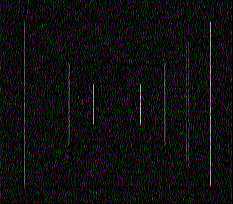

In [211]:
c

In [12]:
# x方向眷積
n=5
image_array = image_to_array(image)
h, w, r = image_array.shape # (224, 253, 3)

zero_array = np.zeros(1)
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下

image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右
image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右
h1, w1, r1 = image_array.shape # (226, 255, 3)


#w,h = image.size

# 銳化的mesh 5*5
window = ([
    [-1, -1, -1, -1, -1],
    [-1,  2,  2,  2, -1],
    [-1,  2,  8,  2, -1],
    [-1,  2,  2,  2, -1],
    [-1, -1, -1, -1, -1]
])

sharpen_mesh_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh[:,:,(0)])
            #print(y, x)
        for rgb in range(3):
            pixel_value =  np.sum(mesh[:,:,(rgb)]*window)/8
            if pixel_value<0:
                pixel_value = 0
            elif pixel_value>255:
                pixel_value = 255
            else:
                pass
            sharpen_mesh_list.append(pixel_value)

In [13]:
sharpen_mesh_array = np.array(sharpen_mesh_list, dtype='uint8')

In [14]:
sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])

In [15]:
c = Image.fromarray(sharpen_mesh_array_reshape, 'RGB')

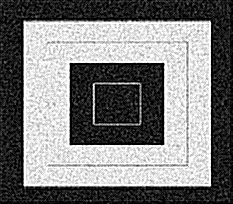

In [16]:
c

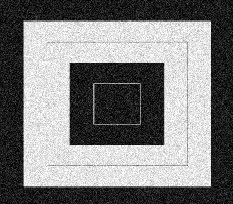

In [248]:
image

In [261]:
# y方向眷積
n=3
image_array = image_to_array(image)
h, w, r = image_array.shape # (224, 253, 3)

zero_array = np.zeros(n)
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下
image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右

h1, w1, r1 = image_array.shape # (226, 255, 3)


#w,h = image.size

# 銳化的mesh
window = ([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
init = 0
temp_b = np.zeros([h,1,(3)], dtype='uint8')
sharpen_mesh_list = []
for x in np.arange(0, w1-1, 1):
    if init == 1:
        
        a = np.array(sharpen_mesh_list , dtype='uint8')
        #print(a.shape)
        b = a.reshape([h,1,(3)])
        temp_b = np.concatenate((temp_b, b), axis = 1)
        sharpen_mesh_list = []
    for y in np.arange(0, h1, 1):
        if x==w1:
            continue
        init = 1
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh.shape)
            #print(y, x)
        for rgb in range(3):
            pixel_value =  np.sum(mesh[rgb]*window)/8
            if pixel_value<0:
                pixel_value = 0
            elif pixel_value>255:
                pixel_value = 255
            else:
                pass
            sharpen_mesh_list.append(pixel_value)
temp_b = np.delete(temp_b, 0, axis = 1)

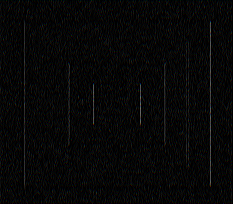

In [262]:
d = Image.fromarray(temp_b, 'RGB')
d

In [18]:
image.size

(233, 204)

In [19]:
image_array.shape

(206, 235, 3)

In [47]:
# 中值濾波
# x方向眷積
n=3
image_array = image_to_array(image)
h, w, r = image_array.shape # (224, 253, 3)

zero_array = np.zeros(3)
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下
image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右

h1, w1, r1 = image_array.shape # (226, 255, 3)

median_list = []
median_value = 0
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh.shape)
            #print(y, x)
        for rgb in range(3):
            median_value = np.median(mesh[:,:,(rgb)])
            median_list.append(median_value)

In [48]:
sharpen_mesh_array.shape

(141288,)

In [10]:
sharpen_mesh_array = np.array(median_list, dtype='uint8')

In [276]:
sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])

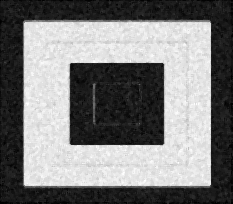

In [277]:
d = Image.fromarray(sharpen_mesh_array_reshape, 'RGB')
d

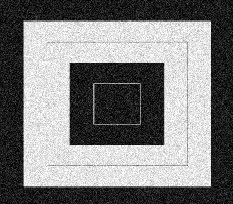

In [269]:
image

In [24]:
image.size

(233, 204)

In [25]:
image_array.shape

(208, 237, 3)

In [53]:
# 中值濾波
# x方向眷積
n=5
image_array = image_to_array(image)
h, w, r = image_array.shape # (224, 253, 3)
zero_array = np.zeros(1)
padding = int(n//2)
for i in range(padding):
    image_array = np.insert(image_array, 0, zero_array, axis=0) #上
    image_array = np.insert(image_array, h, zero_array, axis=0) #下
    image_array = np.insert(image_array, 0, zero_array, axis=1) #左
    image_array = np.insert(image_array, w, zero_array, axis=1) #右

h1, w1, r1 = image_array.shape # (226, 255, 3)

median_list = []
median_value = 0
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh.shape)
            #print(y, x)
        for rgb in range(3):
            median_value = np.median(mesh[:,:,(rgb)])
            median_list.append(median_value)

In [56]:
sharpen_mesh_array.shape

(142596,)

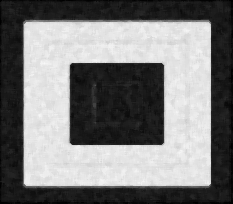

In [55]:
sharpen_mesh_array = np.array(median_list, dtype='uint8')
sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
d = Image.fromarray(sharpen_mesh_array_reshape, 'RGB')
d

In [283]:
# x方向眷積
n=5
image_array = image_to_array(d)
h, w, r = image_array.shape # (224, 253, 3)

zero_array = np.zeros(3)
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下
image_array = np.insert(image_array, 0, zero_array, axis=0) #上
image_array = np.insert(image_array, h, zero_array, axis=0) #下

image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右
image_array = np.insert(image_array, 0, zero_array, axis=1) #左
image_array = np.insert(image_array, w, zero_array, axis=1) #右
h1, w1, r1 = image_array.shape # (226, 255, 3)


#w,h = image.size

# 銳化的mesh 5*5
window = ([
    [-1, -1, -1, -1, -1],
    [-1,  2,  2,  2, -1],
    [-1,  2,  8,  2, -1],
    [-1,  2,  2,  2, -1],
    [-1, -1, -1, -1, -1]
])

sharpen_mesh_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh[:,:,(0)])
            #print(y, x)
        for rgb in range(3):
            pixel_value =  np.sum(mesh[:,:,(rgb)]*window)/8
            if pixel_value<0:
                pixel_value = 0
            elif pixel_value>255:
                pixel_value = 255
            else:
                pass
            sharpen_mesh_list.append(pixel_value)

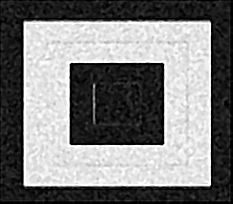

In [284]:
sharpen_mesh_array = np.array(sharpen_mesh_list, dtype='uint8')
sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
c = Image.fromarray(sharpen_mesh_array_reshape, 'RGB')
c

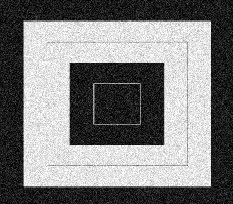

In [280]:
image

In [63]:
# 均值濾波
n=5
image_array = image_to_array(image)
h, w, r = image_array.shape # (224, 253, 3)
zero_array = np.zeros(1)
padding = int(n//2)
for i in range(padding):
    image_array = np.insert(image_array, 0, zero_array, axis=0) #上
    image_array = np.insert(image_array, h, zero_array, axis=0) #下
    image_array = np.insert(image_array, 0, zero_array, axis=1) #左
    image_array = np.insert(image_array, w, zero_array, axis=1) #右

h1, w1, r1 = image_array.shape # (226, 255, 3)

median_list = []
median_value = 0
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        if   (x+n > w1) or (y+n > h1):
            continue
        else:
            mesh = image_array[y:y+n, x:x+n]
            #print(mesh.shape)
            #print(y, x)
        for rgb in range(3):
            median_value = np.mean(mesh[:,:,(rgb)])
            median_list.append(median_value)

In [64]:
sharpen_mesh_array.shape

(142596,)

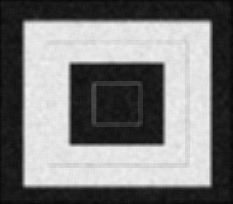

In [65]:
sharpen_mesh_array = np.array(median_list, dtype='uint8')
sharpen_mesh_array_reshape = sharpen_mesh_array.reshape([h, w ,(r)])
d = Image.fromarray(sharpen_mesh_array_reshape, 'RGB')
d

In [34]:
# contrast
'''
1. 先用 桶子排序法 將x = grey value, y = pixel of frequency列成直方圖
2. 將直方圖的grey value找出max/min，並且定義出新的max/min
    (1)分別對rgb
    (2)grey value的RMS的對比量度，對應到RGB
3. 將所有桶子定義出新的 grey value後取代。
'''
# 將匯入的圖片轉成array
image_array = image_to_array(image)
h1, w1, r1 = image_array.shape

# 將array中的RGB分別存成list
r_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        r_list.append(image_array[y, x,(0)])

g_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        g_list.append(image_array[y, x,(1)])

b_list = []
for y in np.arange(0, h1, 1):
    for x in np.arange(0, w1, 1):
        b_list.append(image_array[y,x,(2)])

# 桶子排序法
max_unit8 = 256 #一共有256個桶子，每個桶子存取相對應grey value的個數(count)。
r_bucket = []
for i in range(max_unit8):
    r_bucket.append(0)
# 將grey_value一個一個從list中讀取，並且丟到相對應的桶子
for grey_value in r_list:
    r_bucket[grey_value] = r_bucket[grey_value] + 1

'''
# 將bugket內的資料丟回r_list並且grey_value從小排到大。
index = 0
for i in range(len(bucket)):
    if bucket[i] != 0:
        for j in range(bucket[i]):
            r_list[index] = i
            index += 1
'''
r_bucket_grey_value = []
for i in range(max_unit8):
    r_bucket_grey_value.append(i)
    
r_hist_dict = dict(zip(r_bucket_grey_value, r_bucket))



In [35]:
r_hist_dict

{0: 1087,
 1: 392,
 2: 372,
 3: 364,
 4: 313,
 5: 339,
 6: 318,
 7: 333,
 8: 349,
 9: 350,
 10: 365,
 11: 419,
 12: 424,
 13: 433,
 14: 536,
 15: 518,
 16: 506,
 17: 549,
 18: 515,
 19: 528,
 20: 532,
 21: 467,
 22: 489,
 23: 467,
 24: 507,
 25: 500,
 26: 511,
 27: 453,
 28: 477,
 29: 476,
 30: 530,
 31: 518,
 32: 566,
 33: 509,
 34: 456,
 35: 491,
 36: 509,
 37: 470,
 38: 403,
 39: 363,
 40: 340,
 41: 324,
 42: 275,
 43: 271,
 44: 275,
 45: 252,
 46: 243,
 47: 218,
 48: 243,
 49: 209,
 50: 230,
 51: 201,
 52: 165,
 53: 174,
 54: 144,
 55: 134,
 56: 117,
 57: 91,
 58: 105,
 59: 84,
 60: 74,
 61: 61,
 62: 57,
 63: 73,
 64: 60,
 65: 36,
 66: 43,
 67: 42,
 68: 36,
 69: 28,
 70: 30,
 71: 27,
 72: 23,
 73: 18,
 74: 16,
 75: 17,
 76: 12,
 77: 14,
 78: 14,
 79: 15,
 80: 20,
 81: 13,
 82: 12,
 83: 14,
 84: 15,
 85: 27,
 86: 23,
 87: 11,
 88: 21,
 89: 14,
 90: 12,
 91: 20,
 92: 17,
 93: 18,
 94: 14,
 95: 25,
 96: 11,
 97: 19,
 98: 16,
 99: 16,
 100: 15,
 101: 22,
 102: 11,
 103: 17,
 104: 17,
 

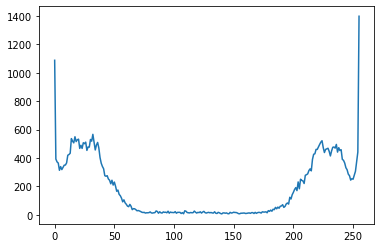

In [53]:
import matplotlib.pylab as plt

plt.plot(r_bucket_grey_value, r_bucket)
plt.show()